In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_excel(r'D:/Machine_learning/unsupervised/E_commerce_analytics/E-com_Data.xlsx')

<h3>Describe Data

In [37]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [40]:
df['Price'].describe()

count    537979.000000
mean       2161.414593
std        4538.487177
min      -10152.000000
25%         451.000000
50%        1194.000000
75%        2232.000000
max       90400.000000
Name: Price, dtype: float64

In [41]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

<h3> Check for Duplicates

In [42]:
df.duplicated().any()

True

In [43]:
df.loc[df.duplicated(), :]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [44]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537970 entries, 0 to 537969
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          537970 non-null  object        
 2   InvoieNo           537970 non-null  int64         
 3   Date of purchase   537970 non-null  datetime64[ns]
 4   Quantity           537970 non-null  int64         
 5   Time               537970 non-null  object        
 6   price per Unit     537970 non-null  float64       
 7   Price              537970 non-null  float64       
 8   Shipping Location  537970 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


<h3>Check for missing values

In [46]:
df.isna().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [47]:
#percentage of missing values
df.isna().sum() / len(df) * 100

CustomerID            24.869231
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448798
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [48]:
df.dropna(subset=['CustomerID'], inplace=True)

In [49]:
#dropping Cancelled_status, Reason of return ,Sold as set columns
df = df.iloc[:, 0:9]
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [50]:
df.isna().sum()

CustomerID           0
Item Code            0
InvoieNo             0
Date of purchase     0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [51]:
#analyze customers via RFM (Recency, Frequency and Monetory value) approach.

In [52]:
df['date'] = df['Date of purchase']
df['date_1'] = df['date']
df.head(2)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,date,date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05


In [53]:
#Latest Date for Recency
import datetime as dt
print(max(df['Date of purchase']))
latest_date = dt.datetime(2017, 12, 20)
print(latest_date)

2017-12-19 00:00:00
2017-12-20 00:00:00


In [54]:
rmf = df.groupby('CustomerID').agg({'date_1': lambda x: (latest_date-x.max()).days, 'date': lambda x: x.count(), 
                             'Price': lambda x: x.sum()}).reset_index()

In [55]:
rmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4349 non-null   float64
 1   date_1      4349 non-null   int64  
 2   date        4349 non-null   int64  
 3   Price       4349 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.0 KB


In [56]:
rmf.rename(columns={'date_1': 'Recency', 'date': 'frequency', 'Price': 'Monetory'}, inplace=True)

In [57]:
rmf.head()

,CustomerID,Recency,frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


In [58]:
rmf.describe()

,CustomerID,Recency,frequency,Monetory
count,4349.000000,4349.000000,4349.000000,4.349000e+03
mean,2187.093355,93.299379,92.936537,2.299380e+05
std,1261.544319,100.701315,232.086935,8.572589e+05
min,2.000000,1.000000,1.000000,-5.037200e+04
25%,1095.000000,18.000000,17.000000,3.814800e+04
50%,2186.000000,51.000000,42.000000,8.365500e+04
75%,3279.000000,144.000000,101.000000,2.056120e+05
max,4372.000000,381.000000,7970.000000,3.553619e+07


In [59]:
quantiles = rmf.drop('CustomerID', axis=1).quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [60]:
def recency_map(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def fm_map(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [61]:
rmf['r'] = rmf['Recency'].apply(recency_map, args=('Recency', quantiles))
rmf['f'] = rmf['frequency'].apply(fm_map, args=('frequency', quantiles))
rmf['m'] = rmf['Monetory'].apply(fm_map, args=('Monetory', quantiles))

In [62]:
rmf.head(10)

,CustomerID,Recency,frequency,Monetory,r,f,m
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
5,7.0,208,4,9410.0,4,4,4
6,8.0,233,58,135550.0,4,2,2
7,9.0,215,13,65832.0,4,4,3
8,10.0,25,58,331601.0,2,2,1
9,11.0,34,131,771439.0,2,1,1


In [63]:
rmf['rmfScore'] = rmf[['r', 'f', 'm']].sum(axis=1)

In [67]:
rmf['loyalty_level'] = pd.qcut(rmf['rmfScore'], q=4, labels=['diamond', 'platinum', 'gold', 'silver'])

In [68]:
rmf.head(20)

,CustomerID,Recency,frequency,Monetory,r,f,m,rmfScore,loyalty_level
0,2.0,4,182,553704.0,1,1,1,3,diamond
1,3.0,77,27,257404.0,3,3,1,7,platinum
2,4.0,19,72,176613.0,2,2,2,6,platinum
3,5.0,311,16,41976.0,4,4,3,11,silver
4,6.0,37,84,151822.0,2,2,2,6,platinum
5,7.0,208,4,9410.0,4,4,4,12,silver
6,8.0,233,58,135550.0,4,2,2,8,platinum
7,9.0,215,13,65832.0,4,4,3,11,silver
8,10.0,25,58,331601.0,2,2,1,5,diamond
9,11.0,34,131,771439.0,2,1,1,4,diamond


In [69]:
# handling negative values in monetary
def neg_handler(num):
    if num <=0:
        return 1
    else:
        return num

In [71]:
rmf['Monetory'] = [neg_handler(x) for x in rmf['Monetory']]

In [72]:
rmf.head(20)

,CustomerID,Recency,frequency,Monetory,r,f,m,rmfScore,loyalty_level
0,2.0,4,182,553704.0,1,1,1,3,diamond
1,3.0,77,27,257404.0,3,3,1,7,platinum
2,4.0,19,72,176613.0,2,2,2,6,platinum
3,5.0,311,16,41976.0,4,4,3,11,silver
4,6.0,37,84,151822.0,2,2,2,6,platinum
5,7.0,208,4,9410.0,4,4,4,12,silver
6,8.0,233,58,135550.0,4,2,2,8,platinum
7,9.0,215,13,65832.0,4,4,3,11,silver
8,10.0,25,58,331601.0,2,2,1,5,diamond
9,11.0,34,131,771439.0,2,1,1,4,diamond


In [76]:
rmf[rmf['loyalty_level']=='diamond'].sort_values('Monetory', ascending=False).head(10)

,CustomerID,Recency,frequency,Monetory,r,f,m,rmfScore,loyalty_level
1694,1704.0,3,2053,35536194.0,1,1,1,3,diamond
1886,1896.0,2,5874,17743855.0,1,1,1,3,diamond
54,56.0,25,757,14357682.0,2,1,1,4,diamond
1337,1346.0,10,1395,12647317.0,1,1,1,3,diamond
3780,3802.0,3,1060,12319439.0,1,1,1,3,diamond
4211,4234.0,3,322,10654918.0,1,1,1,3,diamond
998,1006.0,5,571,9351019.0,1,1,1,3,diamond
3186,3203.0,5,269,8102167.0,1,1,1,3,diamond
2181,2193.0,1,2489,7966054.0,1,1,1,3,diamond
1438,1448.0,5,1638,7892625.0,1,1,1,3,diamond


<h3> Building Model

In [77]:
df_final = rmf[['Recency', 'frequency', 'Monetory']]

In [80]:
df_final.index = rmf['CustomerID']

In [81]:
df_final.head()

,Recency,frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final)

In [97]:
scaled_df = pd.DataFrame(scaled_df, columns=['Recency', 'frequency', 'Monetory'], index= df_final.index)

In [98]:
scaled_df.head()

,Recency,frequency,Monetory
CustomerID,,,
2.0,-0.886877,0.383795,0.377669
3.0,-0.161877,-0.284135,0.031987
4.0,-0.737904,-0.090220,-0.062268
5.0,2.162093,-0.331537,-0.219344
6.0,-0.559137,-0.038510,-0.091191


In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_score for 2 samples
2 0.9260886694132879
calinski_harabasz_score for 2 samples
2 1949.0895345095498
silhouette_score for 3 samples
3 0.5961713881010539
calinski_harabasz_score for 3 samples
3 3038.9128765211167
silhouette_score for 4 samples
4 0.597558425398268
calinski_harabasz_score for 4 samples
4 3010.6962932968318
silhouette_score for 5 samples
5 0.596250108137117
calinski_harabasz_score for 5 samples
5 3259.7488961344625
silhouette_score for 6 samples
6 0.5859213540886602
calinski_harabasz_score for 6 samples
6 3860.6761534310685
silhouette_score for 7 samples
7 0.5227397772325747
calinski_harabasz_score for 7 samples
7 4144.573395580572
silhouette_score for 8 samples
8 0.49814739961074234
calinski_harabasz_score for 8 samples
8 4184.103898171555
silhouette_score for 9 samples
9 0.5126293044595378
calinski_harabasz_score for 9 samples
9 4104.13629144845
silhouette_score for 10 samples
10 0.510105057476773
calinski_harabasz_score for 10 samples
10 4342.989184705372
silh

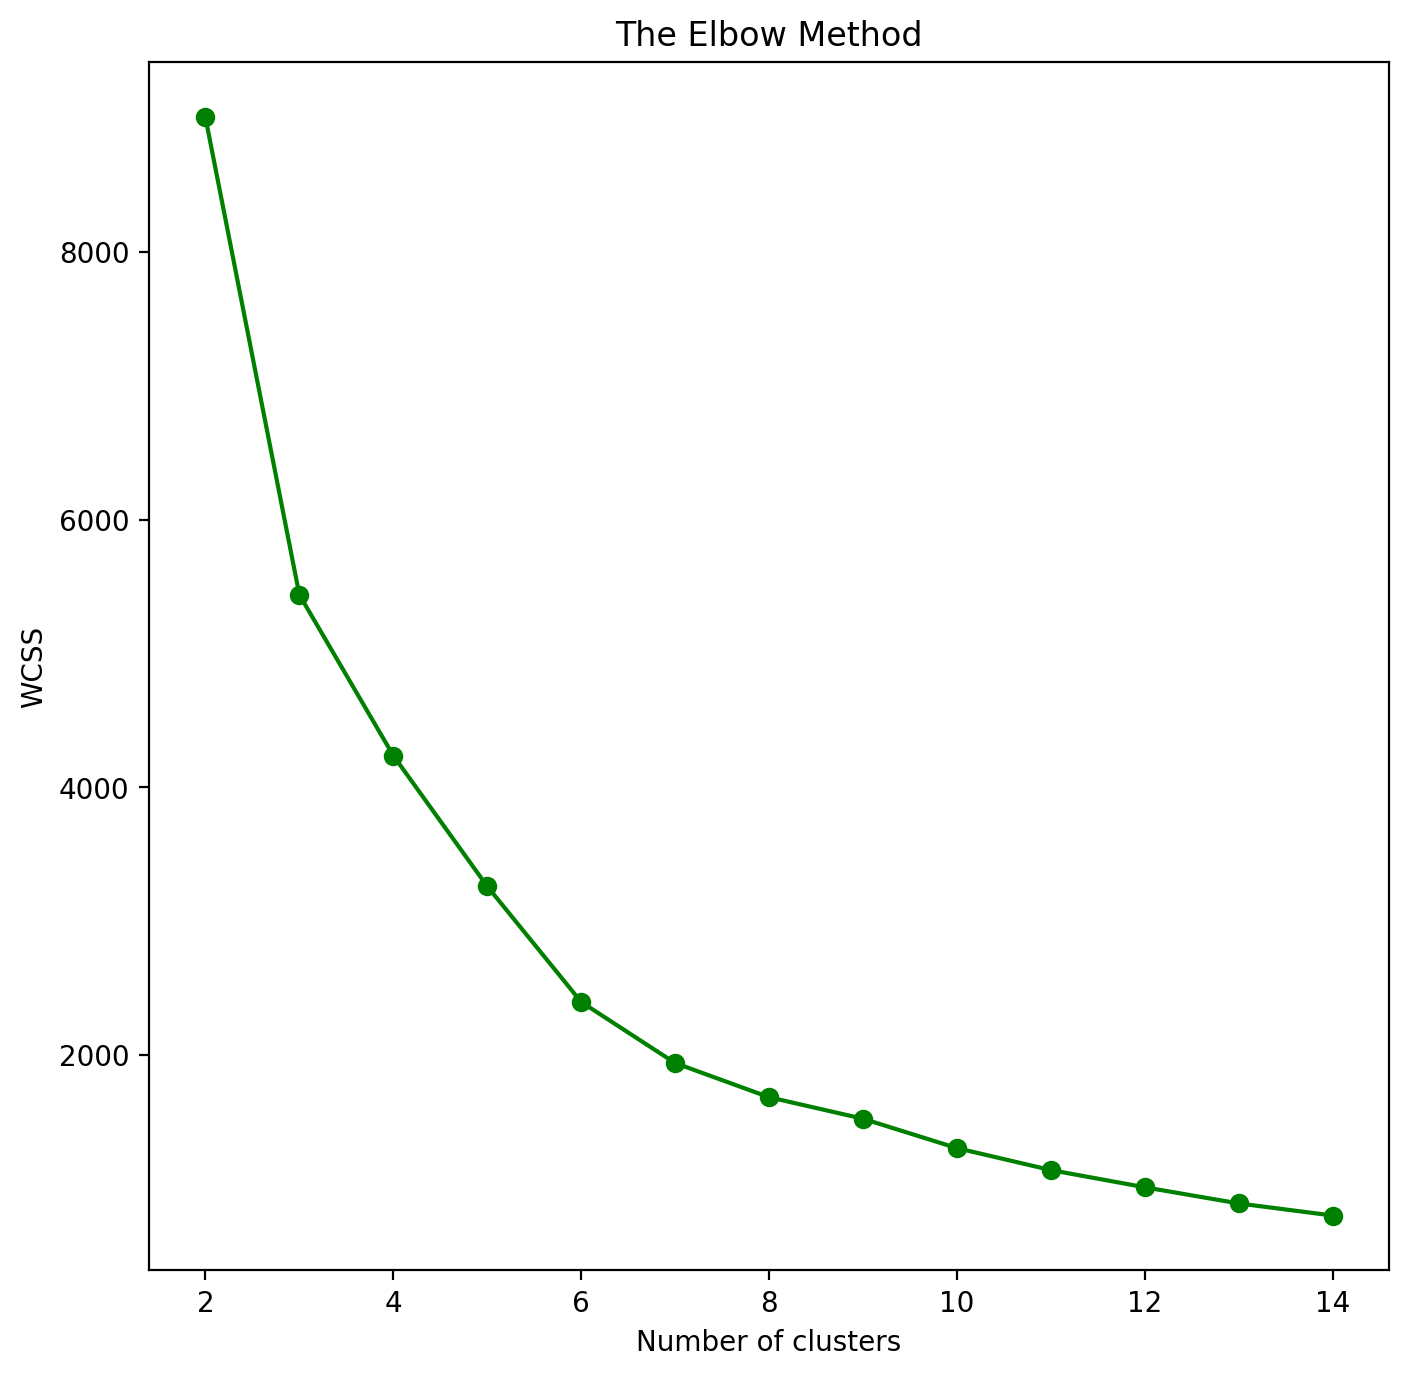

In [94]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(scaled_df)
    labels = kmeans.predict(scaled_df)
    print(f"silhouette_score for {i} samples")
    print (i, silhouette_score(scaled_df,labels))
    print(f"calinski_harabasz_score for {i} samples")
    print (i, calinski_harabasz_score(scaled_df,labels))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 8), dpi=200)
plt.plot(range(2, 15), wcss, marker='o', color='green',)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, random_state = 101)
y_kmeans = kmeans.fit_predict(scaled_df)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset
df_final['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df_final.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Recency,frequency,Monetory
cluster,,,
1.0,92.1,94.5,242496.3
2.0,123.4,58.3,160548.0
3.0,96.4,89.5,196945.7
4.0,137.0,32.8,91185.8
